In [1]:
def evaluate_model(filepath):
    
    # import packages for processing data
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import math
    
    # import packages for evaluation
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.metrics import confusion_matrix, plot_confusion_matrix
    
    # load predicted v actual data
    lasso_prediction = pd.read_csv(filepath)

    # extract each set of data as a list
    test_set_list = lasso_prediction['real'].tolist()
    Test_predict_list = lasso_prediction['pred'].tolist()
    
    # Visualize the result in test 
    plt.rcParams['figure.dpi'] = 61
        # MUST be at the start of the visualisation codes
        # better way to match size of figure to report_df; 
        # tricker to use figure.figsize
    plt.plot(test_set_list, 
             color = 'red', label = f'Actual Aug-Sep 2022 {filepath[16:19]} Price')
    plt.plot(Test_predict_list, 
             color = 'blue', label = f'Predicted Aug-Sep 2022 {filepath[16:19]} Price')
    plt.title(f'{filepath[16:19]} Price Prediction Aug-Sep 2022 (TEST)')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # compute differences; this is to eventually get an "up vs down" prediction 
    test_difference = [item - test_set_list[idx - 1] for idx, item in enumerate(test_set_list)][1:]
    predict_difference = [item - Test_predict_list[idx - 1] for idx, item in enumerate(Test_predict_list)][1:]

    # combine the list back into a df
    predict_v_test = pd.DataFrame(
        {'predict_difference': predict_difference,
         'test_difference': test_difference
        })

    # replace values in df with 0 for <0 and 1 for >0
    # 0 indicate "to sell" and 1 indicate "to buy"
    df = predict_v_test
    df[df< 0 ] = 0 
    df[df> 0 ] = 1 

    # Define the traget names
    target_names = ['Down Day', 'Up Day']

    # Build a classifcation report

    y_pred = df['predict_difference'].values.tolist()
    y_test = df['test_difference'].values.tolist()

    report = classification_report(y_true = y_test, y_pred = y_pred, 
                                   target_names = target_names, output_dict = True)

    # Add it to a data frame, transpose it for readability.
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.round(decimals=2)
    return report_df

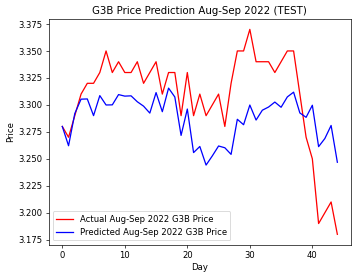

,precision,recall,f1-score,support
Down Day,0.76,0.70,0.73,23.00
Up Day,0.70,0.76,0.73,21.00
accuracy,0.73,0.73,0.73,0.73
macro avg,0.73,0.73,0.73,44.00
weighted avg,0.73,0.73,0.73,44.00


In [2]:
evaluate_model('lasso_real_pred_G3B.csv')

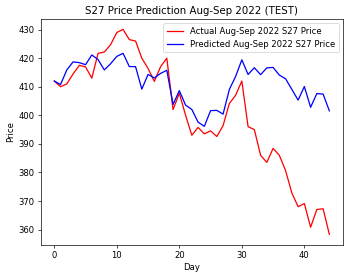

,precision,recall,f1-score,support
Down Day,0.75,0.78,0.77,23.00
Up Day,0.75,0.71,0.73,21.00
accuracy,0.75,0.75,0.75,0.75
macro avg,0.75,0.75,0.75,44.00
weighted avg,0.75,0.75,0.75,44.00


In [3]:
evaluate_model('lasso_real_pred_S27.csv')

In [4]:
def evaluate_model_train(filepath):
    
    # import packages for processing data
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import math
    
    # import packages for evaluation
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.metrics import confusion_matrix, plot_confusion_matrix
    
    # load predicted v actual data
    lasso_prediction = pd.read_csv(filepath)

    # extract each set of data as a list
    test_set_list = lasso_prediction['real'].tolist()
    Test_predict_list = lasso_prediction['pred'].tolist()
    
    # Visualize the result in TRAINING (ie 2022M1 to M7)
    plt.rcParams['figure.dpi'] = 61
    plt.plot(test_set_list, 
             color = 'red', label = f'Actual Jan-Jul 2022 {filepath[16:19]} Price')
    plt.plot(Test_predict_list, 
             color = 'blue', label = f'Predicted Jan-Jul 2022 {filepath[16:19]} Price')
    plt.title(f'{filepath[16:19]} Price Prediction Jan-Jul 2022 (Train)')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # compute differences; this is to eventually get an "up vs down" prediction 
    test_difference = [item - test_set_list[idx - 1] for idx, item in enumerate(test_set_list)][1:]
    predict_difference = [item - Test_predict_list[idx - 1] for idx, item in enumerate(Test_predict_list)][1:]

    # combine the list back into a df
    predict_v_test = pd.DataFrame(
        {'predict_difference': predict_difference,
         'test_difference': test_difference
        })

    # replace values in df with 0 for <0 and 1 for >0
    # 0 indicate "to sell" and 1 indicate "to buy"
    df = predict_v_test
    df[df< 0 ] = 0 
    df[df> 0 ] = 1 

    # Define the traget names
    target_names = ['Down Day', 'Up Day']

    # Build a classifcation report

    y_pred = df['predict_difference'].values.tolist()
    y_test = df['test_difference'].values.tolist()

    report = classification_report(y_true = y_test, y_pred = y_pred, 
                                   target_names = target_names, output_dict = True)

    # Add it to a data frame, transpose it for readability.
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.round(decimals=2)
    return report_df

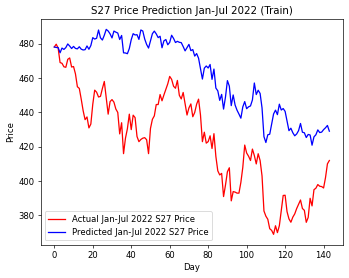

,precision,recall,f1-score,support
Down Day,0.66,0.68,0.67,74.00
Up Day,0.64,0.62,0.63,69.00
accuracy,0.65,0.65,0.65,0.65
macro avg,0.65,0.65,0.65,143.00
weighted avg,0.65,0.65,0.65,143.00


In [5]:
evaluate_model_train('lasso_real_pred_S27_train.csv')